# Assignment 1 - Discrete Visualization

You are hired as a data scientist at International Trade Administration Industry and Analysis National Travel and Tourism Office, a national bureau dedicating to enhancing tourism in the United States, and get involved in the **International Visitation and Spending in the United States** project. Towards the end of a fiscal year, you received a request from the headquarter to obtain insights based on the given tourist visitation number for different states in the U.S. Specifically, you are asked to produce a Jupyter notebook with visualizations that can interact with the 3-year US international visitation data and engage a meeting with various stakeholders, including the headquarter of national travel and tourism in a high-profile video conference.

## Question 0: Load Data (0% - But Required)

Complete the function `load_data` below to load and organize the dataset that we will use in subsequent questions.  You should return a pandas Datafile with 5 columns titled “state”, “visitation_2016”, “visitation_2017”, “visitation_2018”, and “visitation_2019”.  The first column should contain a state and the subsequent columns the number of visitors in each corresponding year.

The following instructions will help you do that correctly:

* First import the `US_States_Visited_2017.xlsx`, `US_States_Visited_2018.xlsx` and `US_States_Visited_2019.xlsx` datasets. The three datasets are located at the assets folder. You may start with `read_excel()` function in pandas and remove the top and bottom rows. In each file, some column should contain the state.  Subsequent columns include the number of visitors in two different years.   Note that some data is duplicated, and the year of the datafile indicates when the file was made available (so 2016 data is in the 2017 datafile).

* After that, pick out the relevant columns.  Note that you will need to multiply all the visitation numbers by 1,000. For example, in 2019, the recorded visitation for Alabama state was supposed to be 141,000 after multiplying 1,000. This must be applied for all 3 datasets.

* Finally, you should merge the 3 datasets together, and rename the merged dataset called `merged_US_states_visitation`. The merged dataset should retain only the census states called `state`, 2016 visitation data called `visitation_2016`, 2017 visitation data called `visitation_2017`, 2018 visitation data called `visitation_2018`and 2019 visitation data called `visitation_2019`. To avoid confusion, when we join the datasets, keep every states that ever has international visitation data. Finally, order the state names alphabetically. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

Visited_2017 = "assets/US_States_Visited_2017.xlsx"
Visited_2018 = "assets/US_States_Visited_2018.xlsx"
Visited_2019 = "assets/US_States_Visited_2019.xlsx"
scale_factor = 1000


def scale(value, factor):
    return value * factor


def load_data():
    # load data from excel and rename the columns
    df_2017 = pd.read_excel(Visited_2017, skiprows=6, usecols="B,D,F")
    df_2017.columns = ['state', 'visitation_2016', 'visitation_2017']
    df_2017 = df_2017.dropna()
    df_2018 = pd.read_excel(Visited_2018, skiprows=7, usecols="B,D,G")
    df_2018.columns = ['state', 'visitation_2018', 'visitation_2017']
    df_2018 = df_2018.dropna()
    df_2019 = pd.read_excel(Visited_2019, skiprows=6, usecols="B,D,G")
    df_2019.columns = ['state', 'visitation_2019', 'visitation_2018']
    df_2019 = df_2019.dropna()
    
    # multiply all the visitation numbers by 1,000
    df_2017['visitation_2016'] = df_2017['visitation_2016'].apply(scale, factor=scale_factor)
    df_2017['visitation_2017'] = df_2017['visitation_2017'].apply(scale, factor=scale_factor)
    df_2018['visitation_2017'] = df_2018['visitation_2017'].apply(scale, factor=scale_factor)
    df_2018['visitation_2018'] = df_2018['visitation_2018'].apply(scale, factor=scale_factor)
    df_2019['visitation_2018'] = df_2019['visitation_2018'].apply(scale, factor=scale_factor)
    df_2019['visitation_2019'] = df_2019['visitation_2019'].apply(scale, factor=scale_factor)
    
    # merge all the datasets together
    df_2017['state'] = df_2017['state'].apply(lambda x: x.strip())
    df_2018['state'] = df_2018['state'].apply(lambda x: x.strip())
    df_2019['state'] = df_2019['state'].apply(lambda x: x.strip())
    
    df = df_2017.merge(df_2018, how='outer', on='state')
    df = df.merge(df_2019, how='outer', on='state')
    df.drop(columns=['visitation_2017_y', 'visitation_2018_y'], inplace=True)
    df = df[['state', 'visitation_2016', 'visitation_2017_x', 'visitation_2018_x', 'visitation_2019']]
    df.columns = ['state', 'visitation_2016', 'visitation_2017', 'visitation_2018', 'visitation_2019']
    
    # sort the rows by the state name alphabetically
    df.sort_values(by=['state'], inplace=True)
    df.reset_index(drop=True, inplace=True)
    
    return df

merged_US_states_visitation = load_data()
merged_US_states_visitation

,state,visitation_2016,visitation_2017,visitation_2018,visitation_2019
0,Alabama,1.240000e+05,136000.0,155545.0,141000.0
1,Alaska,NaN,NaN,135603.0,109000.0
2,Arizona,1.157751e+06,1035000.0,1168582.0,1196000.0
3,California,8.220783e+06,8178000.0,8531051.0,8050000.0
4,Colorado,4.849022e+05,459000.0,550390.0,509000.0
5,Connecticut,3.232681e+05,303000.0,291149.0,323000.0
6,Florida,9.540168e+06,9481000.0,9376578.0,9610000.0
7,Georgia,8.758310e+05,879000.0,837551.0,868000.0
8,Guam,1.582510e+06,1681000.0,1615276.0,1842000.0
9,Hawaiian Islands,3.146226e+06,3319000.0,3182692.0,3296000.0


In [2]:
# Tests
# These tests do not ensure that your solution is correct, but are meant to help you find out where you might have gone wrong
df = load_data()
assert type(df)==pd.DataFrame, "Your return value must be a pandas DataFrame"
assert df.index.size == 40, "You should have 40 rows in your solution"
assert all(['visitation_' + str(year) in df.columns for year in [2016, 2017, 2018, 2019]]), "Some of your column name are incorrect"
try:
   assert df.iloc[0].name == 'Alabama', "We expected to see Alabama as the first entry but it was not"
except:
   assert df['state'].iloc[0] == 'Alabama', "We expected to see Alabama as the first entry but it was not"

In [3]:
try:
   assert df.loc['Iowa'].isnull().values.any() == True
except:
   assert df.iloc[12].isnull().values.any() == True

In [4]:
try:
   assert df.loc['Michigan'].isnull().values.any() == False
except:
   assert df.iloc[18].isnull().values.any() == False

In [5]:
assert round(df['visitation_2016'].mean(),1) == 1489649.3
assert round(df['visitation_2017'].mean(),1) == 1507142.9
assert round(df['visitation_2018'].mean(),1) == 1398576.5
assert round(df['visitation_2019'].mean(),1) == 1353375.0

## Question 1: Bar Chart (60%)

Make use of the merged data to complete the function `make_bar_chart` below. The elements requested by the management team for the first visualization are:
* Make 4 plots, each of which is a bar chart representing the total visitation (as y-axis) of each state (shown in x-axis) in year 2016, 2017, 2018 and 2019. Each plot should use the data for each year.
* Make the figures readable by adjusting the figure size, and specify the year of each plot using the title (e.g., A proper title of the plot using 2016 visitation data could be something like “Visitation data 2016”.)

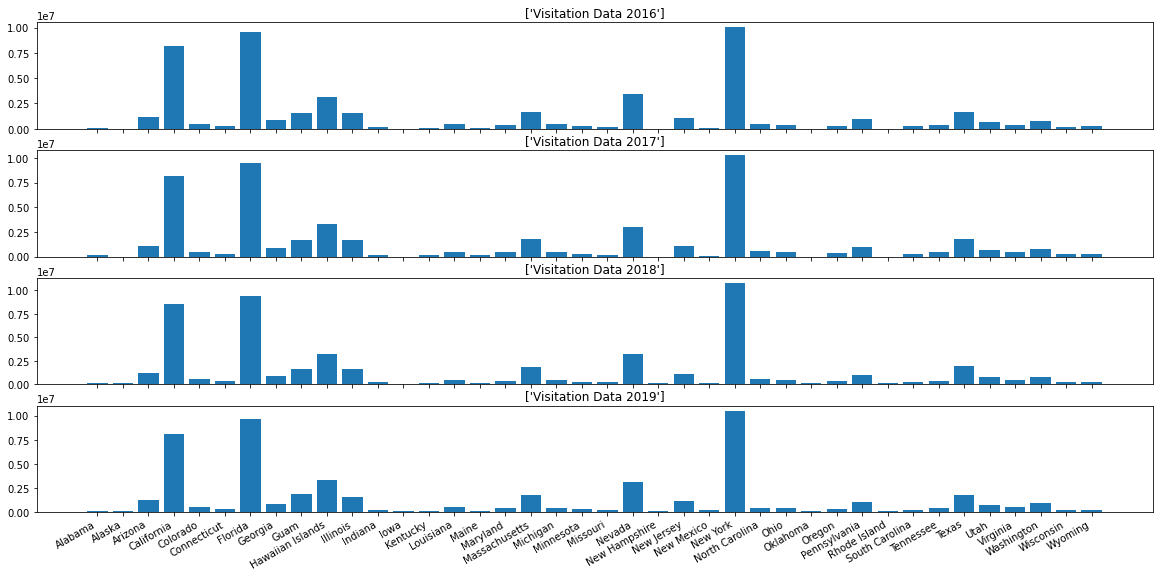

In [6]:
def make_bar_chart(data):
    fig, axs = plt.subplots(4, 1, figsize=(20,10))
    axs[0].bar(data['state'], data['visitation_2016'])
    axs[0].title.set_text(['Visitation Data 2016'])
    axs[1].bar(data['state'], data['visitation_2017'])
    axs[1].title.set_text(['Visitation Data 2017'])
    axs[2].bar(data['state'], data['visitation_2018'])
    axs[2].title.set_text(['Visitation Data 2018'])
    axs[3].bar(data['state'], data['visitation_2019'])
    axs[3].title.set_text(['Visitation Data 2019'])
    fig.autofmt_xdate()

make_bar_chart(load_data())

## Question 2: Transformation (40%)
After a week, the management team returned the report back to you can say "Hey! The visualization looks highly skewed. We could hardly see what is happening in the last few states." 

To better visualize the visitation data to the stakeholders, your manager told you a new requirement: perform **log-transformation** on the visitation number (use log base 10) and make the same bar charts again and:

* Build the bar chart again with all visitation number log-transformed
* (Optional) If you want, you can annotate inside the graphs about the trend you observe in the new subplots. (E.g. In what way does log-transformation improve the visualizations?)

Note: You make log-transform the data, or log-transform the chart representation of the data. Both are possible, it's up to you.

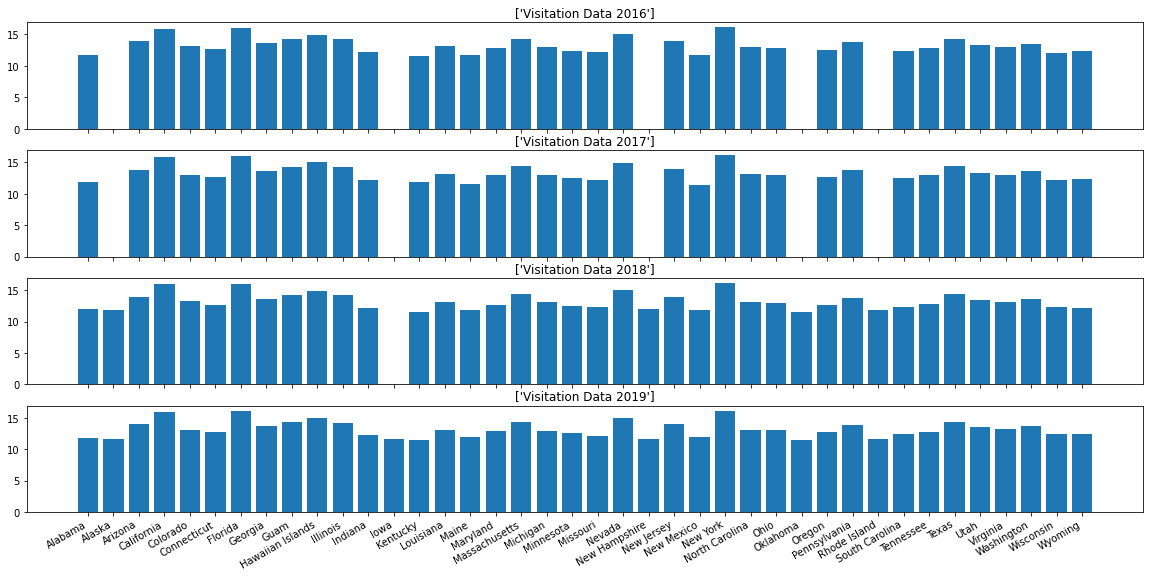

In [11]:
def make_transformed_bar_chart(data): 
    fig, axs = plt.subplots(4, 1, figsize=(20,10))
    data['visitation_2016'] = np.log(data['visitation_2016'])
    axs[0].bar(data['state'], data['visitation_2016'])
    axs[0].title.set_text(['Visitation Data 2016'])
   
    
    data['visitation_2017'] = np.log(data['visitation_2017'])
    axs[1].bar(data['state'], data['visitation_2017'])
    axs[1].title.set_text(['Visitation Data 2017'])
    
    
    data['visitation_2018'] = np.log(data['visitation_2018'])
    axs[2].bar(data['state'], data['visitation_2018'])
    axs[2].title.set_text(['Visitation Data 2018'])
    
    
    data['visitation_2019'] = np.log(data['visitation_2019'])
    axs[3].bar(data['state'], data['visitation_2019'])
    axs[3].title.set_text(['Visitation Data 2019'])
    
    fig.autofmt_xdate()

make_transformed_bar_chart(load_data())